In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv('C:/Users/DELL E7440/Desktop/Download Data - STOCK_US_XNAS_TSLA.csv')


In [8]:
dataset.head()


,Date,Open,High,Low,Close,Volume
0,09/15/2021,745.00,756.86,738.36,755.83,"15,357,690"
1,09/14/2021,742.57,754.47,736.40,744.49,"18,524,881"
2,09/13/2021,740.21,744.78,708.85,743.00,"22,952,480"
3,09/10/2021,759.60,762.61,734.52,736.27,"15,184,170"
4,09/09/2021,753.41,762.10,751.63,754.86,"14,077,730"


In [68]:
dataset['Date'] = pd.to_datetime(dataset.Date)


In [9]:
dataset.shape


(22, 6)

In [10]:
dataset.head()



,Date,Open,High,Low,Close,Volume
0,09/15/2021,745.00,756.86,738.36,755.83,"15,357,690"
1,09/14/2021,742.57,754.47,736.40,744.49,"18,524,881"
2,09/13/2021,740.21,744.78,708.85,743.00,"22,952,480"
3,09/10/2021,759.60,762.61,734.52,736.27,"15,184,170"
4,09/09/2021,753.41,762.10,751.63,754.86,"14,077,730"


In [11]:
dataset.isnull().sum()



Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
dataset.isna().any()


Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [13]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    22 non-null     object 
 1   Open    22 non-null     float64
 2   High    22 non-null     float64
 3   Low     22 non-null     float64
 4   Close   22 non-null     float64
 5   Volume  22 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.2+ KB


In [14]:
dataset.describe()



,Open,High,Low,Close
count,22.000000,22.000000,22.000000,22.000000
mean,718.905455,728.503182,708.998182,720.072273
std,28.462102,26.905656,29.090191,28.150315
min,669.750000,674.580000,648.840000,665.710000
25%,705.017500,712.847500,684.967500,702.445000
50%,723.485000,732.500000,710.790000,731.650000
75%,740.157500,752.047500,733.707500,741.317500
max,761.580000,764.450000,751.630000,755.830000


In [15]:
print(len(dataset))


22


<AxesSubplot:>

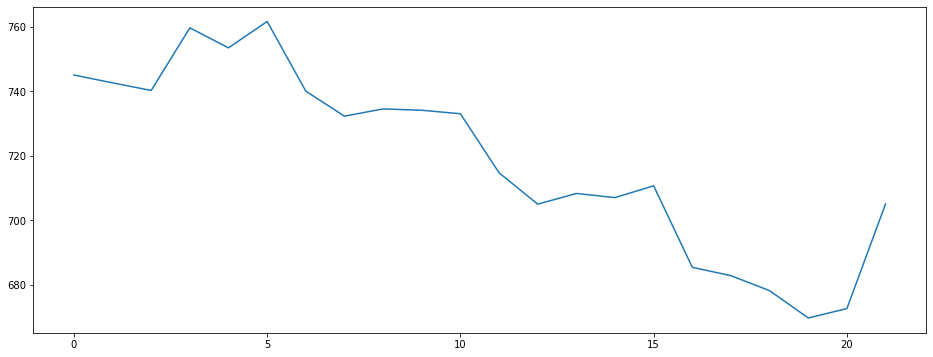

In [16]:
dataset['Open'].plot(figsize=(16,6))


In [17]:
X  = dataset[['Open','High','Low']]
y = dataset['Close']

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [19]:
X_train.shape


(16, 3)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()


In [21]:
regressor.fit(X_train,y_train)


LinearRegression()

In [22]:
print(regressor.coef_)


[-0.29102376  1.05111228  0.25250189]


In [23]:
print(regressor.intercept_)


-14.844605882338897


In [24]:
predicted=regressor.predict(X_test)


In [25]:
print(X_test)


      Open    High     Low
20  672.66  674.58  648.84
10  733.00  740.39  726.44
14  707.03  716.97  704.00
13  708.31  715.40  697.62
1   742.57  754.47  736.40
21  705.07  709.50  676.40


In [26]:
predicted.shape


(6,)

In [27]:
dframe=pd.DataFrame(y_test,predicted)


In [28]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})


In [29]:
print(dfr)


    Actual   Predicted
20  665.71  662.288007
10  735.72  733.495480
14  711.20  710.770174
13  701.16  707.136456
1   744.49  748.024962
21  686.17  696.519720


In [30]:
dfr.head(25)


,Actual,Predicted
20,665.71,662.288007
10,735.72,733.495480
14,711.20,710.770174
13,701.16,707.136456
1,744.49,748.024962
21,686.17,696.519720


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [32]:
regressor.score(X_test,y_test)


0.96104517582013

In [33]:
import math


In [34]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))


Mean Absolute Error: 4.322912811302918


In [35]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))


Mean Squared  Error: 28.69566015049823


In [36]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Root Mean Squared Error: 5.356833033658808


In [39]:
graph=dfr.head(20)


<AxesSubplot:>

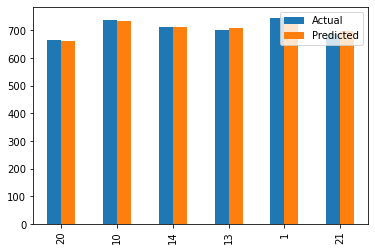

In [40]:
graph.plot(kind='bar')
